In [126]:
import numpy as np
import time
import torch
import torch.nn.functional as F
import pytorch_lightning as pl
import matplotlib.pyplot as plt

In [127]:
# Define softmax function for numpy
logits = np.array([2.0, 1.0, .01])

def softmaxCPU():
    results = []
    times = []
    denominator = np.sum(np.exp(logits))

    for z_i in logits:
        startTime = time.time()    
        x = (np.exp(z_i))
        answer = x / denominator
        endTime = time.time()
        finalTime = (endTime - startTime)
        times.append(finalTime)
        results.append(answer)
        
    return results, times

probs, times = softmaxCPU()
resultsCPU = probs
timeCPU = times

print(resultsCPU)
print(timeCPU)


[0.6646395750638173, 0.244507235454902, 0.09085318948128068]
[4.5299530029296875e-06, 1.9073486328125e-06, 1.1920928955078125e-06]


In [128]:
# Define softmax function for pytorch

device = torch.device('cuda')
cudaLogits =  torch.tensor([2.0, 1.0, 0.1], device=device)

def softmaxGPU():    
    timeGPU = []
    resultsGPU = []
    denominator = torch.sum(torch.exp(cudaLogits))
    for z_i in cudaLogits:
        startTime = time.time()
        x = torch.exp(z_i)
        results = x / denominator
        endTime = time.time()
        duration = endTime - startTime
        timeGPU.append(duration)
        resultsGPU.append(results)
    return resultsGPU, timeGPU


resultsGPU, timeGPU = softmaxGPU()

print(resultsGPU)
print(timeGPU)

[tensor(0.6590, device='cuda:0'), tensor(0.2424, device='cuda:0'), tensor(0.0986, device='cuda:0')]
[3.0994415283203125e-05, 2.4318695068359375e-05, 1.4781951904296875e-05]


[0 1 2 3]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (3,).

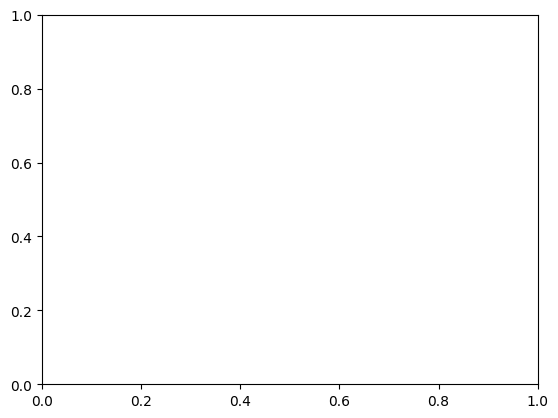

In [ ]:
# Plotting execution time vs input size
indices = [0,1,2]
bar_width = 0.15
x = np.arange(len(indices))
print(x)

plt.figure()
plt.bar(x - bar_width, timeCPU, width=bar_width, label="CPU")
plt.bar(x + bar_width, timeGPU, width=bar_width, label='GPU')

plt.xlabel('Data')
plt.ylabel('Execution Time (Seconds)')
plt.title('Softmax Execution Time vs Input Size (CPU)')

plt.xticks(x, [f"Element {i}" for i in indices])

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()